In [111]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from math import sin, cos, sqrt, atan2, radians
import math
import scipy.stats as stats

In [2]:
# Desired columns
new_cols = ['Incident Day of Week', 'Incident Date', 'Incident Time', 'Incident Category', 
            'Incident Description', 'Police District','Latitude', 'Longitude', 'Point']
old_cols = ['DayOfWeek', 'Date', 'Time', 'Category', 'Descript',
            'PdDistrict', 'Y', 'X', 'location']

# Clear missing values based on these columns
new_subset = ['Point','Incident Category']
old_subset = ['PdDistrict']

# Standardize column names
new_rename = {'Incident Date':'Date',
            'Incident Time': 'Time', 
            'Incident Day of Week': 'Day of Week',
            'Incident Category':'Category',
            'Incident Description':'Description'}
old_rename = {'PdId':'Row ID',
            'Descript':'Description',
            'DayOfWeek':'Day of Week',
            'PdDistrict':'Police District',
            'X':'Longitude',
            'Y':'Latitude',
            'location':'Point'}

# Read in the datasets
new = pd.read_csv("/work/Police_Department_Incident_Reports__2018_to_Present.csv", usecols=new_cols).dropna(subset=new_subset).rename(columns=new_rename)
old = pd.read_csv("/work/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv", usecols=old_cols).dropna(subset=old_subset).rename(columns=old_rename)

In [3]:
# List of crimes that can be committed near or at a navigation center
crime_list = ['assault', 'larceny/theft', 'vandalism', 
            'drug/narcotic', 'vehicle theft', 'sex offenses, forcible',
            'robbery', 'burglary', 'drunkenness', 'disorderly conduct', 'prostitution',
            'weapon laws', 'trespass', 'kidnapping', 'stolen property', 
            'arson', 'loitering', 'gambling', 'liquor laws', 'sex offenses, non forcible',
            'larceny theft', 'malicious mischief', 'drug offense', 'motor vehicle theft',
            'offences against the family and children', 'warrant', 'weapons offense',
            'civil sidewalks', 'weapons carrying etc',
            'homicide', 'sex offense', 'drug violation', 'rape', 'weapons offence']

# Function to clean the "Category" column 
def crime_filter(crime):
    weapons_offense = ['weapon laws', 'weapons carrying etc', 'weapons offence']
    drug_offense = ['drug violation', 'drug/narcotic']
    theft = ['larceny theft', 'larceny/theft', 'motor vehicle theft','vehicle theft', 'stolen property']
    sex_offense = ['sex offenses, forcible', 'sex offenses, non forcible', 'rape']

    if crime in weapons_offense:
        return 'weapons offense'
    elif crime in drug_offense:
        return 'drug offense'
    elif crime in theft:
        return 'theft'
    elif crime in sex_offense:
        return 'sex offense'
    else:
        return crime

# Combined data from 2003-2018 and 2018-2021
combined = pd.concat((new, old), axis=0).sort_values('Date')

# Create columns for year, month, and day
combined['Date'] = pd.to_datetime(combined['Date'])
combined['Year'] = combined['Date'].dt.year.astype(str)
combined['Month'] = combined['Date'].dt.month
combined['Day'] = combined['Date'].dt.day
combined['Week'] = combined['Date'].dt.week

# Remove the word "POINT" from the values in "Point"
combined['Point'] = combined['Point'][0][6:]

# Lowercase strings
combined[['Police District', 'Category', 'Description']] = combined[['Police District', 'Category','Description']].apply(lambda x: x.astype(str).str.lower())

# Remove Police District outside of SF
combined = combined[combined['Police District'] != 'out of sf']
boolean_series = combined['Category'].isin(crime_list)
combined = combined[boolean_series]

# Filter crimes 
combined['Category'] = combined['Category'].apply(crime_filter)

# Filter years 
combined = combined[combined['Year'].astype(int) > 2013]

# Filter latitude and longitude
combined = combined[(combined['Longitude'] >= -122.43) & (combined['Longitude'] <= -122.2)
                  & (combined['Latitude'] >= 0) & (combined['Latitude'] <= 37.79)]

# Reset index
combined = combined.reset_index(drop=True)
combined

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


,Date,Time,Day of Week,Category,Description,Police District,Latitude,Longitude,Point,Year,Month,Day,Week
0,2014-01-01,08:45,Wednesday,assault,aggravated assault with a deadly weapon,bayview,37.737880,-122.390302,NaN,2014,1,1,1
1,2014-01-01,10:00,Wednesday,theft,grand theft of property,mission,37.767770,-122.406668,NaN,2014,1,1,1
2,2014-01-01,15:43,Wednesday,theft,"stolen property, possession with knowledge, re...",tenderloin,37.785672,-122.406853,NaN,2014,1,1,1
3,2014-01-01,22:25,Wednesday,theft,theft of checks or credit cards,bayview,37.730937,-122.373894,NaN,2014,1,1,1
4,2014-01-01,12:13,Wednesday,drug offense,possession of opiates,tenderloin,37.782347,-122.413893,NaN,2014,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392030,2021-05-25,12:00,Tuesday,burglary,"burglary, apartment house, unlawful entry",southern,37.787455,-122.391180,NaN,2021,5,25,21
392031,2021-05-25,14:30,Tuesday,theft,"theft, from locked vehicle, >$950",northern,37.786247,-122.428241,NaN,2021,5,25,21
392032,2021-05-25,00:01,Tuesday,burglary,"burglary, other bldg., forcible entry",mission,37.769603,-122.426309,NaN,2021,5,25,21
392033,2021-05-25,09:30,Tuesday,assault,battery,mission,37.769591,-122.415577,NaN,2021,5,25,21


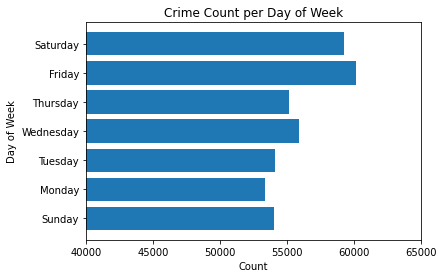

In [4]:
day_of_week_grouped = combined.groupby('Day of Week').size().reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.barh(day_of_week_grouped.index, day_of_week_grouped)
plt.xlim(40000,65000)
plt.title('Crime Count per Day of Week')
plt.xlabel('Count')
plt.ylabel('Day of Week')
plt.show()

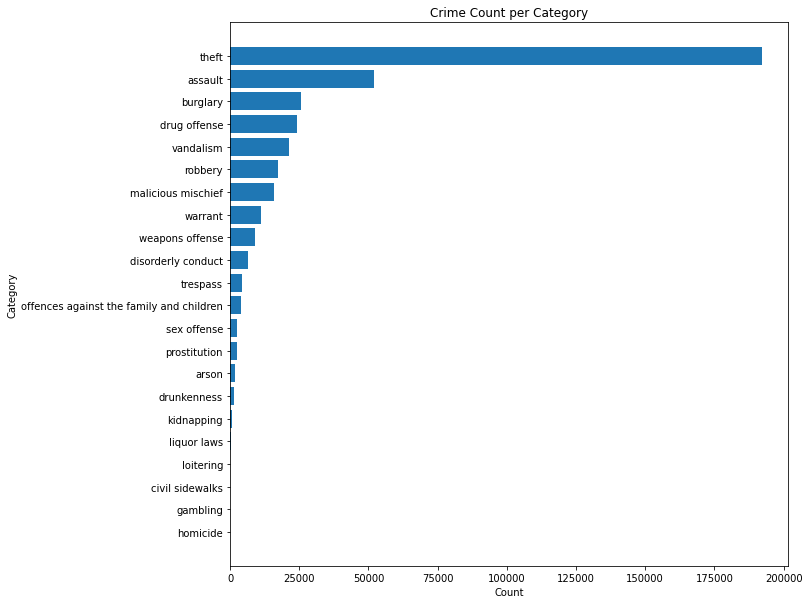

In [5]:
fig = plt.figure(figsize=(10,10))
category_grouped = combined.groupby('Category').size().sort_values()
plt.barh(category_grouped.index, category_grouped) 
plt.title('Crime Count per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

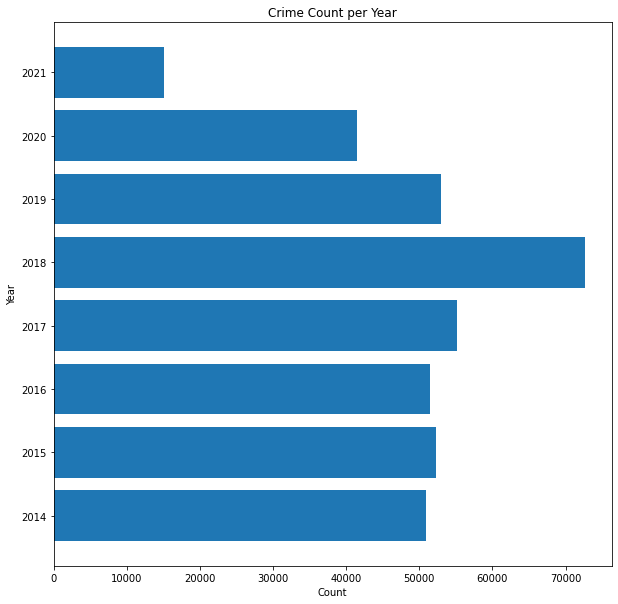

In [6]:
fig = plt.figure(figsize=(10,10))
category_grouped = combined.groupby('Year').size()
plt.barh(category_grouped.index, category_grouped) 
plt.title('Crime Count per Year')
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()

In [7]:
for i in combined['Description'].unique():
    print(i)

aggravated assault with a deadly weapon
grand theft of property
stolen property, possession with knowledge, receiving
theft of checks or credit cards
possession of opiates
petty theft coin operated machine
grand theft from locked auto
burglary of store, unlawful entry
possession of controlled substance
sexual assault, administering drug to commit
robbery on the street with a gun
battery
malicious mischief, vandalism
malicious mischief, vandalism of vehicles
aggravated assault with bodily force
stolen automobile
aggravated assault with a gun
aggravated assault with a knife
firearm, discharging in grossly negligent manner
petty theft from locked auto
attempted homicide with a gun
burglary of residence, unlawful entry
arson of an inhabited dwelling
battery of a police officer
grand theft from person
grand theft pickpocket
petty theft from a building
grand theft from unlocked auto
stolen motorcycle
petty theft of property
robbery, bodily force
possession of cocaine
battery, former spouse o

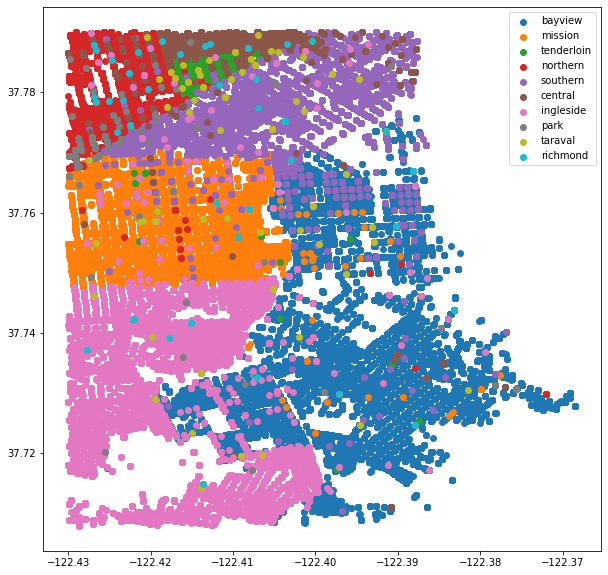

In [8]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot() 
for dist in combined['Police District'].unique():
    idx = combined['Police District'] == dist
    df2 = combined[idx].copy() 
    x = df2['Longitude']
    y = df2['Latitude']
    ax.scatter(x,y,label=dist)
ax.legend()

In [43]:
# approximate radius of earth in km
def distances(shelter_lat, shelter_long, dataset):
    R = 6373.0
    distances = []
    for i in range(len(dataset)):
        if ((math.isnan(dataset.iloc[i]['Latitude'])) | (math.isnan(dataset.iloc[i]['Longitude']))):
            distances.append('nan')
        else:
            lat1 = radians(dataset.iloc[i]['Latitude'])
            lon1 = radians(dataset.iloc[i]['Longitude'])
            lat2 = radians(shelter_lat)
            lon2 = radians(shelter_long)

            dlon = lon2 - lon1
            dlat = lat2 - lat1

            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))

            distance = R * c
            distance_to_miles = distance / 1.609344
            distances.append(distance_to_miles)
    return distances


In [41]:
# _2014 = combined[combined['Year'] == '2014']
# _2015 = combined[combined['Year'] == '2015']
# _2016 = combined[combined['Year'] == '2016']
# _2017 = combined[combined['Year'] == '2017']
# _2018 = combined[combined['Year'] == '2018']
# _2019 = combined[combined['Year'] == '2019']
# _2020 = combined[combined['Year'] == '2020']
# _2021 = combined[combined['Year'] == '2021']

In [42]:
# bayshore_start_date = datetime(2018, 10, 1)
# bayshore_end_date = datetime(2018, 10, 31)

# bryant_start_date = datetime(2018, 12, 1)
# bryant_end_date = datetime(2018, 12, 31)

# division_start_date = datetime(2018, 6, 1)
# division_end_date = datetime(2018, 6, 29)

# central_start_date = datetime(2018, 6, 1)
# central_end_date = datetime(2018, 6, 29)

# civic_start_date = datetime(2016, 6, 1)
# civic_end_date = datetime(2016, 6, 29)

# embarcadero_start_date = datetime(2019, 12, 1)
# embarcadero_end_date = datetime(2019, 12, 31)

In [44]:
# years_bayshore = [_2016,_2017,_2018,_2019,_2020]
# years_bryant = [_2016,_2017,_2018,_2019,_2020]
# years_division = [_2016,_2017,_2018,_2019,_2020]
# years_central = [_2015,_2016,_2017,_2018,_2019]
# years_civic = [_2014,_2015,_2016,_2017,_2018]
# years_embarcadero = [_2017,_2018,_2019,_2020,_2021]

In [45]:
# bayshore = pd.concat(years_bayshore, axis=0).sort_values('Date').reset_index(drop=True)
# bryant = pd.concat(years_bryant, axis=0).sort_values('Date').reset_index(drop=True)
# division = pd.concat(years_division, axis=0).sort_values('Date').reset_index(drop=True)
# central = pd.concat(years_central, axis=0).sort_values('Date').reset_index(drop=True)
# civic = pd.concat(years_civic, axis=0).sort_values('Date').reset_index(drop=True)
# embarcadero = pd.concat(years_embarcadero, axis=0).sort_values('Date').reset_index(drop=True)


In [61]:
# bayshore_weeks_before = bayshore_start_date - timedelta(weeks=52)
# bayshore_weeks_after = bayshore_end_date + timedelta(weeks=52)
# bayshore = bayshore[(bayshore['Date'] >= bayshore_weeks_before) & (bayshore['Date'] <= bayshore_weeks_after)]
# bayshore.loc[:, 'Distance from Bayshore'] = distances(37.746760, -122.403340, bayshore)
# bayshore['within a quarter mile of shelter'] = [True if (bayshore.iloc[i]['Distance from Bayshore'] <= 0.25) else False for i in range(len(bayshore))]
# bayshore = bayshore[bayshore['within a quarter mile of shelter'] == True]

# bryant_weeks_before = bryant_start_date - timedelta(weeks=52)
# bryant_weeks_after = bryant_end_date + timedelta(weeks=52)
# bryant = bryant[(bryant['Date'] >= bryant_weeks_before) & (bryant['Date'] <= bryant_weeks_after)]
# bryant.loc[:, 'Distance from Bryant'] = distances(37.777980, -122.399160, bryant)
# bryant['within a quarter mile of shelter'] = [True if (bryant.iloc[i]['Distance from Bryant'] <= 0.25) else False for i in range(len(bryant))]
# bryant = bryant[bryant['within a quarter mile of shelter'] == True]

# division_weeks_before = division_start_date - timedelta(weeks=52)
# division_weeks_after = division_end_date + timedelta(weeks=52)
# division = division[(division['Date'] >= division_weeks_before) & (division['Date'] <= division_weeks_after)]
# division.loc[:,'Distance from Division'] = distances(37.769470, -122.418541, division)
# division['within a quarter mile of shelter'] = [True if (division.iloc[i]['Distance from Division'] <= 0.25) else False for i in range(len(division))]
# division = division[division['within a quarter mile of shelter'] == True]

# central_weeks_before = central_start_date - timedelta(weeks=52)
# central_weeks_after = central_end_date + timedelta(weeks=52)
# central = central[(central['Date'] >= central_weeks_before) & (central['Date'] <= central_weeks_after)]
# central.loc[:,'Distance from Central'] = distances(37.752940, -122.385690, central)
# central['within a quarter mile of shelter'] = [True if (central.iloc[i]['Distance from Central'] <= 0.25) else False for i in range(len(central))]
# central = central[central['within a quarter mile of shelter'] == True]

# civic_weeks_before = civic_start_date - timedelta(weeks=52)
# civic_weeks_after = civic_end_date + timedelta(weeks=52)
# civic = civic[(civic['Date'] >= civic_weeks_before) & (civic['Date'] <= civic_weeks_after)]
# civic.loc[:,'Distance from Civic'] = distances(37.774150, -122.420180, civic)
# civic['within a quarter mile of shelter'] = [True if (civic.iloc[i]['Distance from Civic'] <= 0.25) else False for i in range(len(civic))]
# civic = civic[civic['within a quarter mile of shelter'] == True]

# embarcadero_weeks_before = embarcadero_start_date - timedelta(weeks=52)
# embarcadero_weeks_after = embarcadero_end_date + timedelta(weeks=52)
# embarcadero = embarcadero[(embarcadero['Date'] >= embarcadero_weeks_before) & (embarcadero['Date'] <= embarcadero_weeks_after)]
# embarcadero.loc[:,'Distance from Embarcadero'] = distances(37.787240, -122.416590,embarcadero)
# embarcadero['within a quarter mile of shelter'] = [True if (embarcadero.iloc[i]['Distance from Embarcadero'] <= 0.25) else False for i in range(len(embarcadero))]
# embarcadero = embarcadero[embarcadero['within a quarter mile of shelter'] == True]


/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [62]:
# compression_opts = dict(method='zip',
#                         archive_name='bayshore.csv')  
# bayshore.to_csv('bayshore.zip', index=False,
#           compression=compression_opts) 


# compression_opts = dict(method='zip',
#                         archive_name='bryant.csv')  
# bryant.to_csv('bryant.zip', index=False,
#           compression=compression_opts) 


# compression_opts = dict(method='zip',
#                         archive_name='division.csv')  
# division.to_csv('division.zip', index=False,
#           compression=compression_opts) 


# compression_opts = dict(method='zip',
#                         archive_name='civic.csv')  
# civic.to_csv('civic.zip', index=False,
#           compression=compression_opts) 


# compression_opts = dict(method='zip',
#                         archive_name='central.csv')  
# central.to_csv('central.zip', index=False,
#           compression=compression_opts) 


# compression_opts = dict(method='zip',
#                         archive_name='embarcadero.csv')  
# embarcadero.to_csv('embarcadero.zip', index=False,
#           compression=compression_opts) 

In [63]:
bayshore = pd.read_csv('/work/cleaned-limited-distanced/bayshore/bayshore.csv')
bryant = pd.read_csv('/work/cleaned-limited-distanced/bryant/bryant.csv')
division = pd.read_csv('/work/cleaned-limited-distanced/division/division.csv')
civic = pd.read_csv('/work/cleaned-limited-distanced/civic/civic.csv')
central = pd.read_csv('/work/cleaned-limited-distanced/central/central.csv')
embarcadero = pd.read_csv('/work/cleaned-limited-distanced/embarcadero/embarcadero.csv')

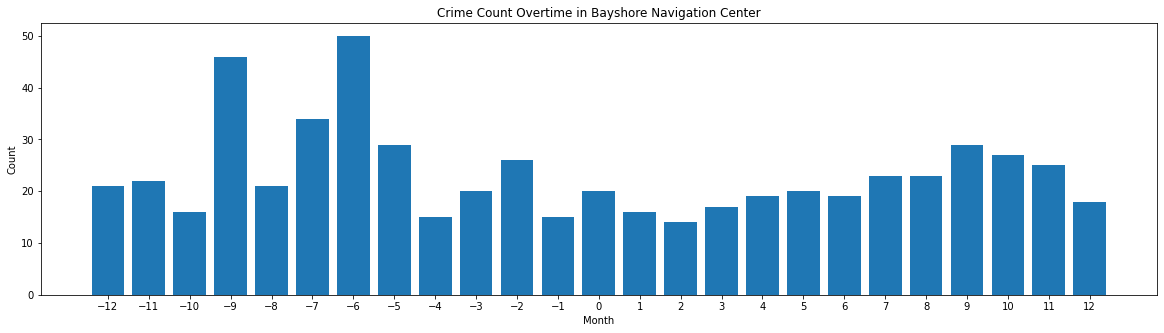

Results of t-test for Bayshore Navigation Center: statistic= 1.4989, p-val= 0.1556



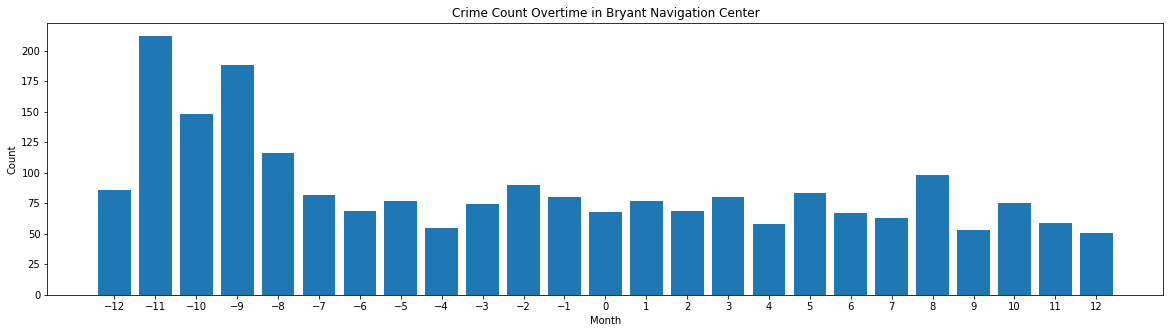

Results of t-test for Bryant Navigation Center: statistic= 2.4683, p-val= 0.0287



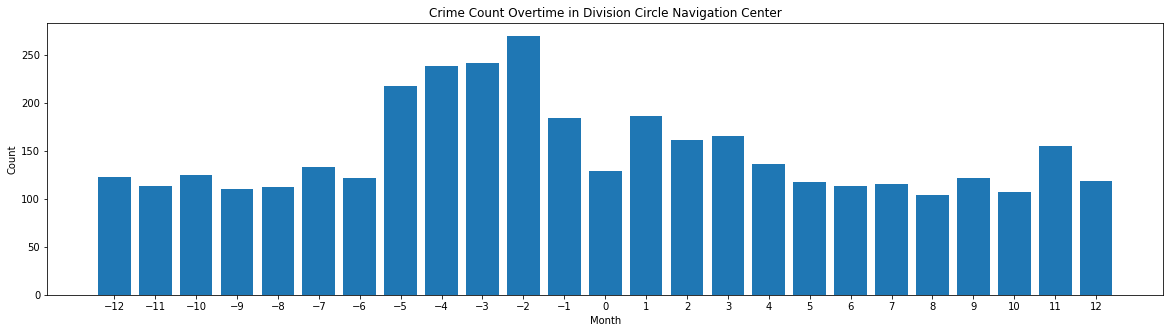

Results of t-test for Division Circle Navigation Center: statistic= 1.6906, p-val= 0.1113



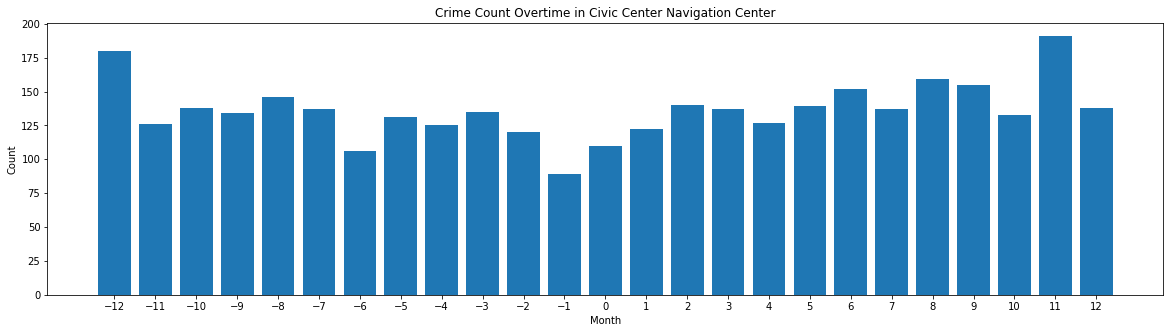

Results of t-test for Civic Center Navigation Center: statistic= -1.6457, p-val= 0.1145



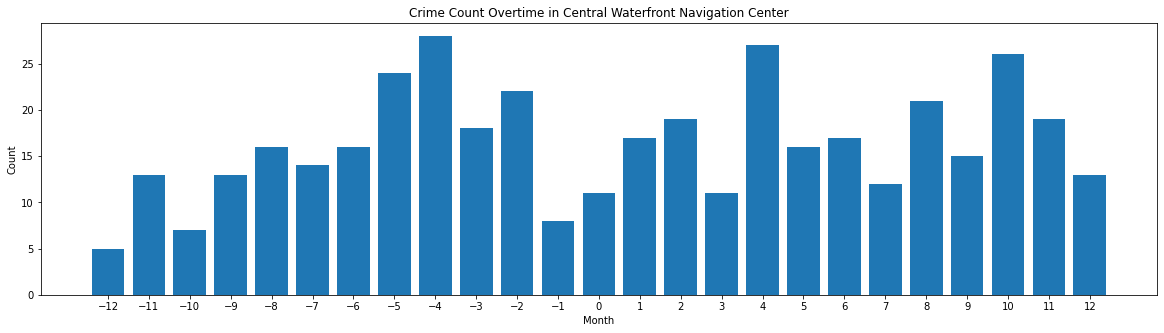

Results of t-test for Central Waterfront Navigation Center: statistic= -0.975, p-val= 0.3411



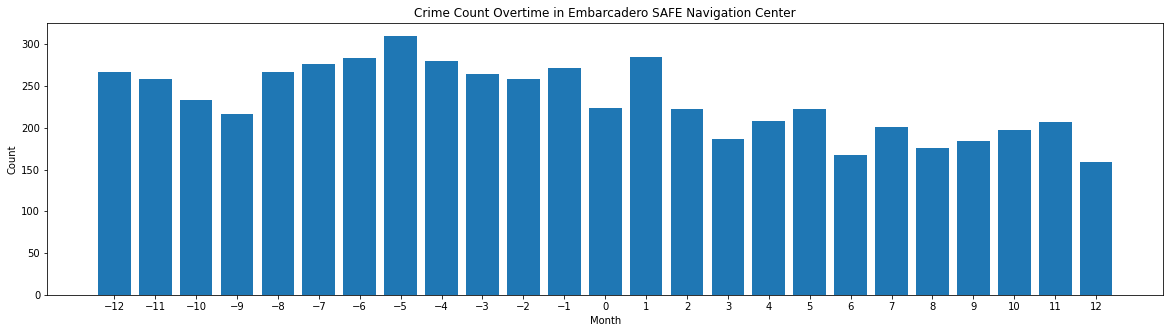

Results of t-test for Embarcadero SAFE Navigation Center: statistic= 5.4527, p-val= 0.0



In [116]:
def crime_overtime(shelters):
    for shelter in shelters:
        shelter_counts = pd.DataFrame({'count':shelter.groupby(['Year','Month']).size()}).reset_index().set_index(np.arange(-12,13,1))
        shelter_before = shelter_counts.iloc[0:12,:]['count'].values
        shelter_after = shelter_counts.iloc[13:,:]['count'].values

        plt.figure(figsize=(20,5))
        plt.bar(shelter_counts.index,shelter_counts['count'])
        plt.title('Crime Count Overtime in {}'.format(shelter.name))
        plt.xlabel('Month')
        plt.ylabel('Count')
        plt.xticks(np.arange(-12,13,1))
        plt.show()

        statistic = stats.ttest_ind(shelter_before, shelter_after, equal_var=False)[0]
        pval = stats.ttest_ind(shelter_before, shelter_after, equal_var=False)[1]
        print('Results of t-test for {}: statistic= {}, p-val= {}'.format(shelter.name,np.round(statistic,4),np.round(pval,4))) # Welch's t-test because unequal variance
        print()

bayshore.name = 'Bayshore Navigation Center'
bryant.name = 'Bryant Navigation Center'
division.name = 'Division Circle Navigation Center'
civic.name = 'Civic Center Navigation Center'
central.name = 'Central Waterfront Navigation Center'
embarcadero.name = 'Embarcadero SAFE Navigation Center'

shelters = [bayshore, bryant, division, civic, central, embarcadero]
crime_overtime(shelters)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1c57c577-35b9-455d-b7fd-e83087aca22f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>